In [10]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Exploring the datasets provided

In [4]:
df_cal = pd.read_csv(r'C:\Users\AMELATTI\Documents\GitHub\project1_seattle_airbnb\data\calendar.csv')
df_list = pd.read_csv(r'C:\Users\AMELATTI\Documents\GitHub\project1_seattle_airbnb\data\listings.csv')
df_rev = pd.read_csv(r'C:\Users\AMELATTI\Documents\GitHub\project1_seattle_airbnb\data\reviews.csv')

In [26]:
print(df_cal.shape)
print(df_list.shape)
print(df_rev.shape)
print('min date {} and max date {}'.format(min(df_cal['date']),max(df_cal['date'])))
df_cal.head()


(1393570, 4)
(3818, 92)
(84849, 6)
min date 2016-01-04 and max date 2017-01-02


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Tried checking availability to use this as a "how often is a place booked?" metric. Unfortunately this was not successful as it doesn't seem to specify whether or not a house is booked or whether it's just not available by owner's choice

<AxesSubplot:>

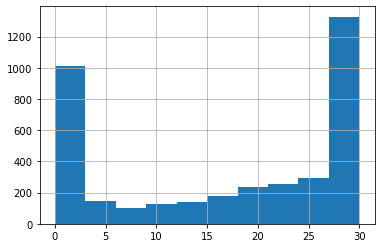

In [24]:
# df_list[df_list['availability_365'] == 365]

# Checking a listing ID for availability
# df_cal[df_cal['listing_id'] == 278830]

#Tried looking through availability, but it doesn't specify whether or not a house is booked or whether it's just not available by owner's choice
df_list['availability_30'].hist()

In [27]:
df_list['property_type'].value_counts()




House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [29]:
df_list['host_is_superhost'].value_counts()

f    3038
t     778
Name: host_is_superhost, dtype: int64

In [28]:
df_list['zipcode'].value_counts()

98122        420
98103        394
98102        339
98105        225
98109        202
98101        201
98144        200
98121        196
98107        180
98115        178
98112        167
98117        164
98118        154
98119        143
98116        112
98104         95
98125         71
98199         66
98126         63
98106         58
98108         56
98133         46
98136         44
98177         19
98178          7
98146          5
98134          5
99\n98122      1
Name: zipcode, dtype: int64

In [57]:
df_list[['id','host_is_superhost','host_id','host_response_time',
'host_response_rate',
'host_acceptance_rate',
'review_scores_communication',
'host_has_profile_pic',
'host_identity_verified',
'host_location',
'host_about']]

,id,host_is_superhost,host_id,host_response_time,host_response_rate,host_acceptance_rate,review_scores_communication,host_has_profile_pic,host_identity_verified,host_location,host_about
0,241032,f,956883,within a few hours,96%,100%,10.0,t,t,"Seattle, Washington, United States","I am an artist, interior designer, and run a s..."
1,953595,t,5177328,within an hour,98%,100%,10.0,t,t,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...
2,3308979,f,16708587,within a few hours,67%,100%,10.0,t,t,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...
3,7421966,f,9851441,NaN,NaN,NaN,NaN,t,t,"Seattle, Washington, United States",NaN
4,278830,f,1452570,within an hour,100%,NaN,10.0,t,t,"Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig..."
...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,f,31148752,within a few hours,99%,100%,8.0,t,t,US,NaN
3814,8902327,f,46566046,within an hour,100%,100%,10.0,t,t,"Seattle, Washington, United States",I am a 58 year old male that is married to Mag...
3815,10267360,f,52791370,NaN,NaN,NaN,NaN,t,f,US,NaN
3816,9604740,f,25522052,within an hour,100%,NaN,NaN,t,t,"Tacoma, Washington, United States",NaN


In [53]:
df_list['host_about'].isna().sum()

859

In [15]:
# print('df_cal = {}, \ndf_list = {}, \ndf_rev = {}'.format(df_cal.columns,df_list.columns,df_rev.columns))
# df_list.columns.to_list()


['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',
